In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.ensemble import RandomForestClassifier
import random
RAND_SEED = 2016 
random.seed(RAND_SEED) # change this to see new random data!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
train_instances = [(0,6,0), (3,4,1), (4,3,0), (5,7,0), (5,2,0), (8,8,2)]
test_instances =  [(1,1), (2,6), (5,3)]

In [6]:
train_df = pd.DataFrame({"x" : [x[0] for x in train_instances], 
                         "y" : [x[1] for x in train_instances],
                         "project" : [x[2] for x in train_instances]}, columns=['x','y','project'])
test_df = pd.DataFrame({"x" : [x[0] for x in test_instances], 
                         "y" : [x[1] for x in test_instances]}, columns=['x','y'])


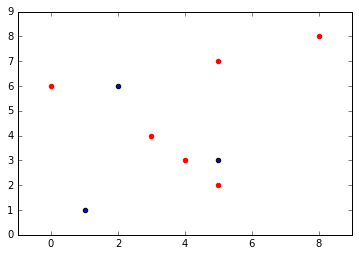

In [7]:
plt.scatter(train_df.x, train_df.y, color="red")
plt.scatter(test_df.x, test_df.y)

In [8]:
train_df

,x,y,project
0,0,6,0
1,3,4,1
2,4,3,0
3,5,7,0
4,5,2,0
5,8,8,2


In [9]:
from tl_algs import peters, burak

In [10]:
p = peters.Peters(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df[['x','y']], 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df.project, 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

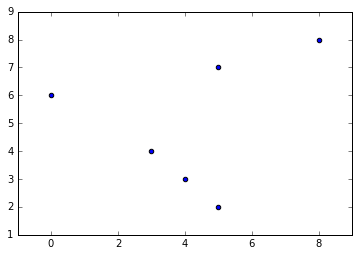

In [11]:
plt.scatter(train_df.x, train_df.y)

In [12]:
p.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X)

(     x    y
 1  3.0  4.0
 2  4.0  3.0, 0    False
 1    False
 dtype: bool)

In [13]:
b = burak.Burak(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df[['x','y']], 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df.project, 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

In [14]:
b.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X, 3)[0]

,x,y
1,3.0,4.0
2,4.0,3.0
4,5.0,2.0
0,0.0,6.0
3,5.0,7.0
